In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading Dataset

In [38]:
data = pd.read_csv('brain_stroke.csv')
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


## Quick EDA

#### Unique values

In [39]:
for column in data.columns:
    if column not in ['age', 'avg_glucose_level', 'bmi']:
        print(f'{column}: {data[column].unique()}')

gender: ['Male' 'Female']
hypertension: [0 1]
heart_disease: [1 0]
ever_married: ['Yes' 'No']
work_type: ['Private' 'Self-employed' 'Govt_job' 'children']
Residence_type: ['Urban' 'Rural']
smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
stroke: [1 0]


#### Checking missing data

In [8]:
data.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### Visualization

<AxesSubplot:xlabel='heart_disease', ylabel='stroke'>

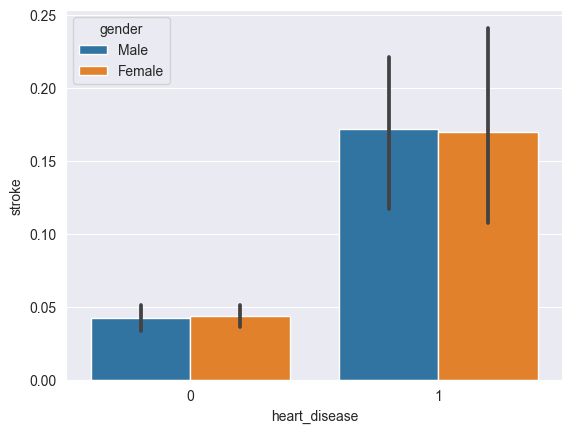

In [5]:
sns.set_style('darkgrid')
sns.barplot(x = 'heart_disease', y = 'stroke', data = data, hue = 'gender')

<AxesSubplot:xlabel='ever_married', ylabel='stroke'>

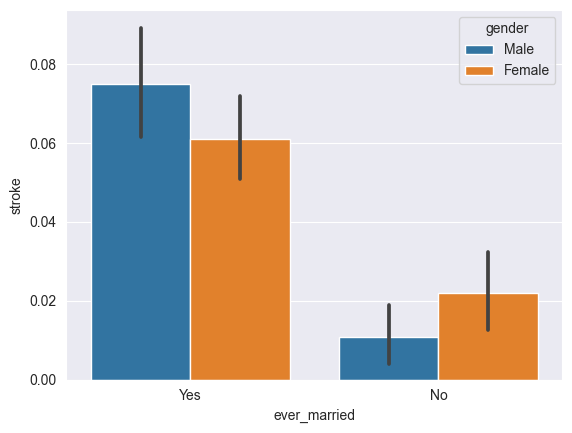

In [6]:
sns.barplot(x = 'ever_married', y = 'stroke', data = data, hue = 'gender')

### Converting dummy variables

In [45]:
df = data
df = df.replace('Yes', 1)
df = df.replace('No', 0)

# df1 = pd.get_dummies(data = df, columns=['gender', 'work_type', 'Residence_type', 'smoking_status'], prefix = '', prefix_sep = '')

In [46]:
for col in data.columns:
    if col in ['gender', 'work_type', 'Residence_type', 'smoking_status']:
        dummy = pd.get_dummies(data = df[col])
        df = pd.concat([df, dummy], axis = 'columns')
        df = df.drop([col], axis = 'columns')
        print(f'Removing column {col} ...')

Removing column gender ...
Removing column work_type ...
Removing column Residence_type ...
Removing column smoking_status ...


In [47]:
df.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,Female,Male,Govt_job,Private,Self-employed,children,Rural,Urban,Unknown,formerly smoked,never smoked,smokes
0,67.0,0,1,1,228.69,36.6,1,0,1,0,1,0,0,0,1,0,1,0,0
1,80.0,0,1,1,105.92,32.5,1,0,1,0,1,0,0,1,0,0,0,1,0
2,49.0,0,0,1,171.23,34.4,1,1,0,0,1,0,0,0,1,0,0,0,1
3,79.0,1,0,1,174.12,24.0,1,1,0,0,0,1,0,1,0,0,0,1,0
4,81.0,0,0,1,186.21,29.0,1,0,1,0,1,0,0,0,1,0,1,0,0


### Normalizing numerical data

In [48]:
from sklearn.preprocessing import MinMaxScaler

for col in ['age', 'avg_glucose_level', 'bmi']:
    df[col] = MinMaxScaler().fit_transform(np.array(df[col]).reshape(-1,1))
    print(f'Scaling column {col} ...')


Scaling column age ...
Scaling column avg_glucose_level ...
Scaling column bmi ...


In [49]:
df.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,Female,Male,Govt_job,Private,Self-employed,children,Rural,Urban,Unknown,formerly smoked,never smoked,smokes
0,0.816895,0,1,1,0.801265,0.647564,1,0,1,0,1,0,0,0,1,0,1,0,0
1,0.975586,0,1,1,0.234512,0.530086,1,0,1,0,1,0,0,1,0,0,0,1,0
2,0.597168,0,0,1,0.536008,0.584527,1,1,0,0,1,0,0,0,1,0,0,0,1
3,0.963379,1,0,1,0.549349,0.286533,1,1,0,0,0,1,0,1,0,0,0,1,0
4,0.987793,0,0,1,0.605161,0.429799,1,0,1,0,1,0,0,0,1,0,1,0,0


### Splitting Data into train and test

In [54]:
from sklearn.model_selection import train_test_split
Y = df['stroke']
X = df.drop(['stroke'], axis = 'columns')
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [60]:
print(f'Number of train features: {train_x.shape[0]}')
print(f'Number of train labels: {train_y.shape[0]}')
print(f'Number of test features: {test_x.shape[0]}')
print(f'Number of test labels: {test_y.shape[0]}')

Number of train features: 3984
Number of train labels: 3984
Number of test features: 997
Number of test labels: 997


### Creating Machine Learning model (Random Forest)

In [61]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 200, random_state = 42)
history = rf.fit(train_x, train_y)

### Model performance on test data

In [62]:
history.score(test_x, test_y)

0.9408224674022067